# MACHINE GAZING🤖👁️‍🗨️✨

In [10]:
import matplotlib.pyplot as plt
import numpy as np




In [11]:
import pandas as pd
import seaborn as sns


In [14]:
#read data set as pd
df= pd.read_csv("../output/Peak_scenes_merged.tsv", sep='\t')

In [15]:
df

,h,w,p,episode,frame,episode_frame,scene_number,onset_frame,offset_frame,global_scene_number
0,215,359,1,friends_s01e01a,1,1,1.0,1.0,539.0,1.0
1,215,359,1,friends_s01e01a,2,2,1.0,1.0,539.0,1.0
2,215,359,1,friends_s01e01a,3,3,1.0,1.0,539.0,1.0
3,215,359,1,friends_s01e01a,4,4,1.0,1.0,539.0,1.0
4,215,359,1,friends_s01e01a,5,5,1.0,1.0,539.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5957068,215,359,1,friends_s06e24b,6086685,20558,158.0,20359.0,20562.0,47659.0
5957069,215,359,1,friends_s06e24b,6086686,20559,158.0,20359.0,20562.0,47659.0
5957070,215,359,1,friends_s06e24b,6086687,20560,158.0,20359.0,20562.0,47659.0
5957071,215,359,1,friends_s06e24b,6086688,20561,158.0,20359.0,20562.0,47659.0


In [16]:
# Define the new bin edges and labels
df["episode_short"] = df["episode"].str.extract(r'(s\d+e\d+)', expand=False).str.upper()
conditions = [
    df['p'] == 1,
    df['p'] == 2,
    df['p'] == 3,
    df['p'] > 3
]
labels = ['1', '2', '3', '>3']

df['p_bin'] = np.select(conditions, labels, default='other') 

# Group by episode and binned p values, then count
frame_counts = df.groupby(['episode_short', 'p_bin'], observed=True).size().unstack(fill_value=0)

# Normalize to get the proportion of each p-bin per episode
frame_proportions = frame_counts.div(frame_counts.sum(axis=1), axis=0)

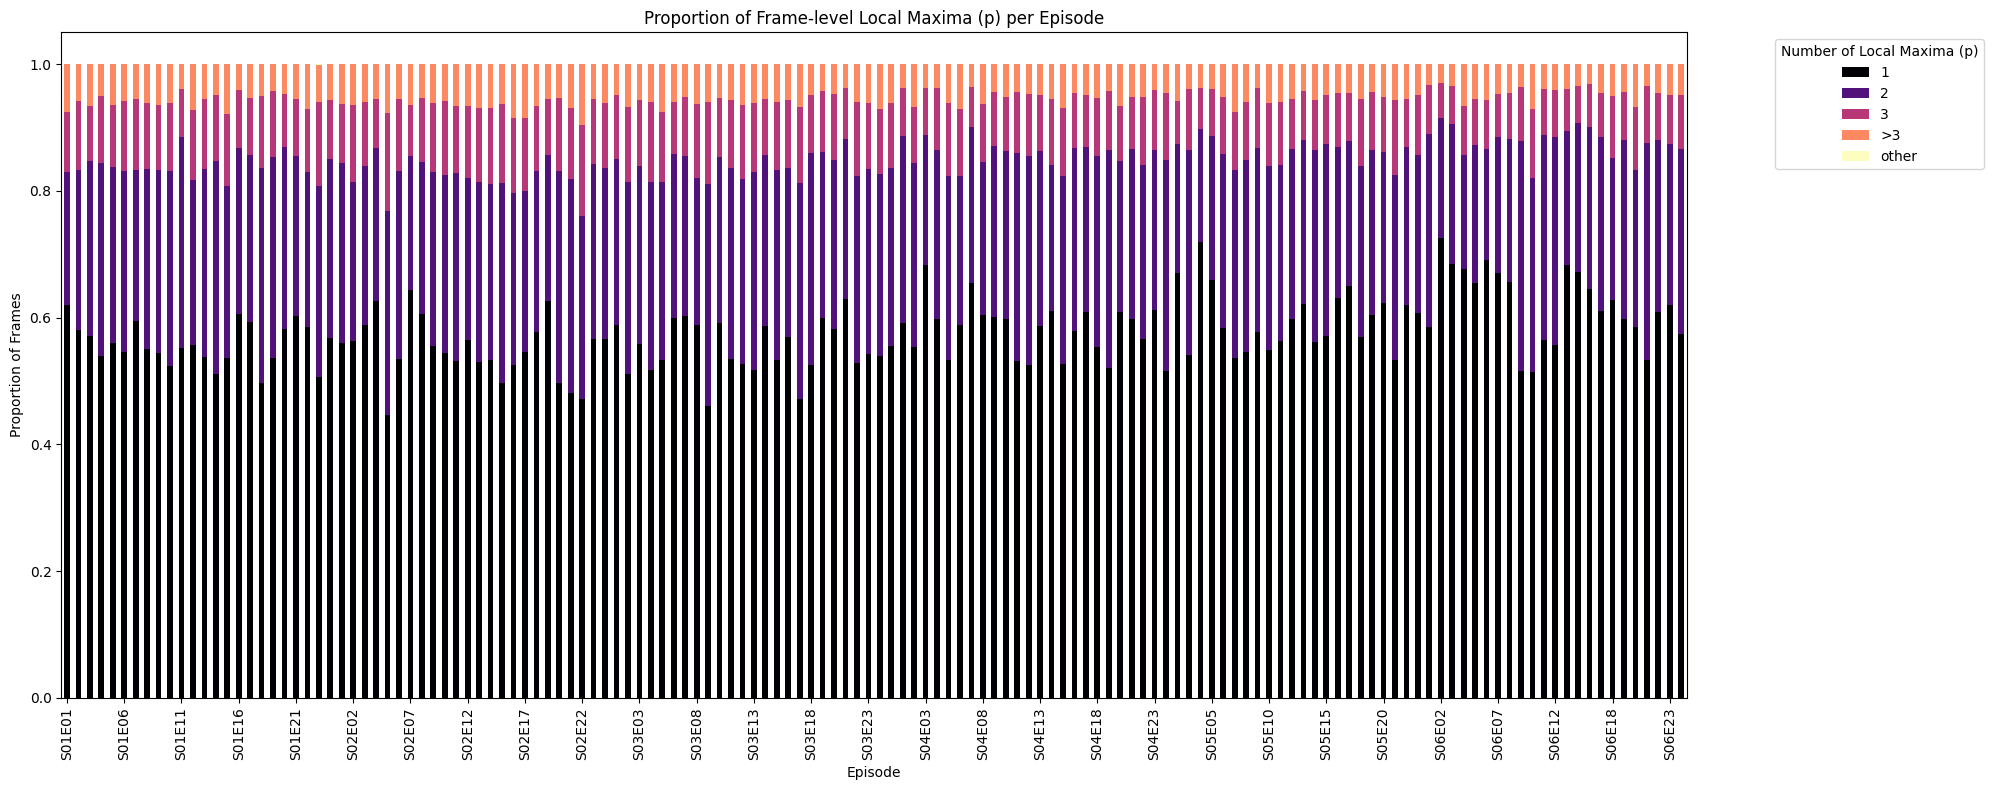

In [17]:
# Plot the proportions as a stacked bar chart
ax = frame_proportions.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='magma')

plt.title("Proportion of Frame-level Local Maxima (p) per Episode")
plt.xlabel("Episode")
plt.ylabel("Proportion of Frames")
plt.legend(title="Number of Local Maxima (p)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
ax.set_xticks(ax.get_xticks()[::5])
plt.show()

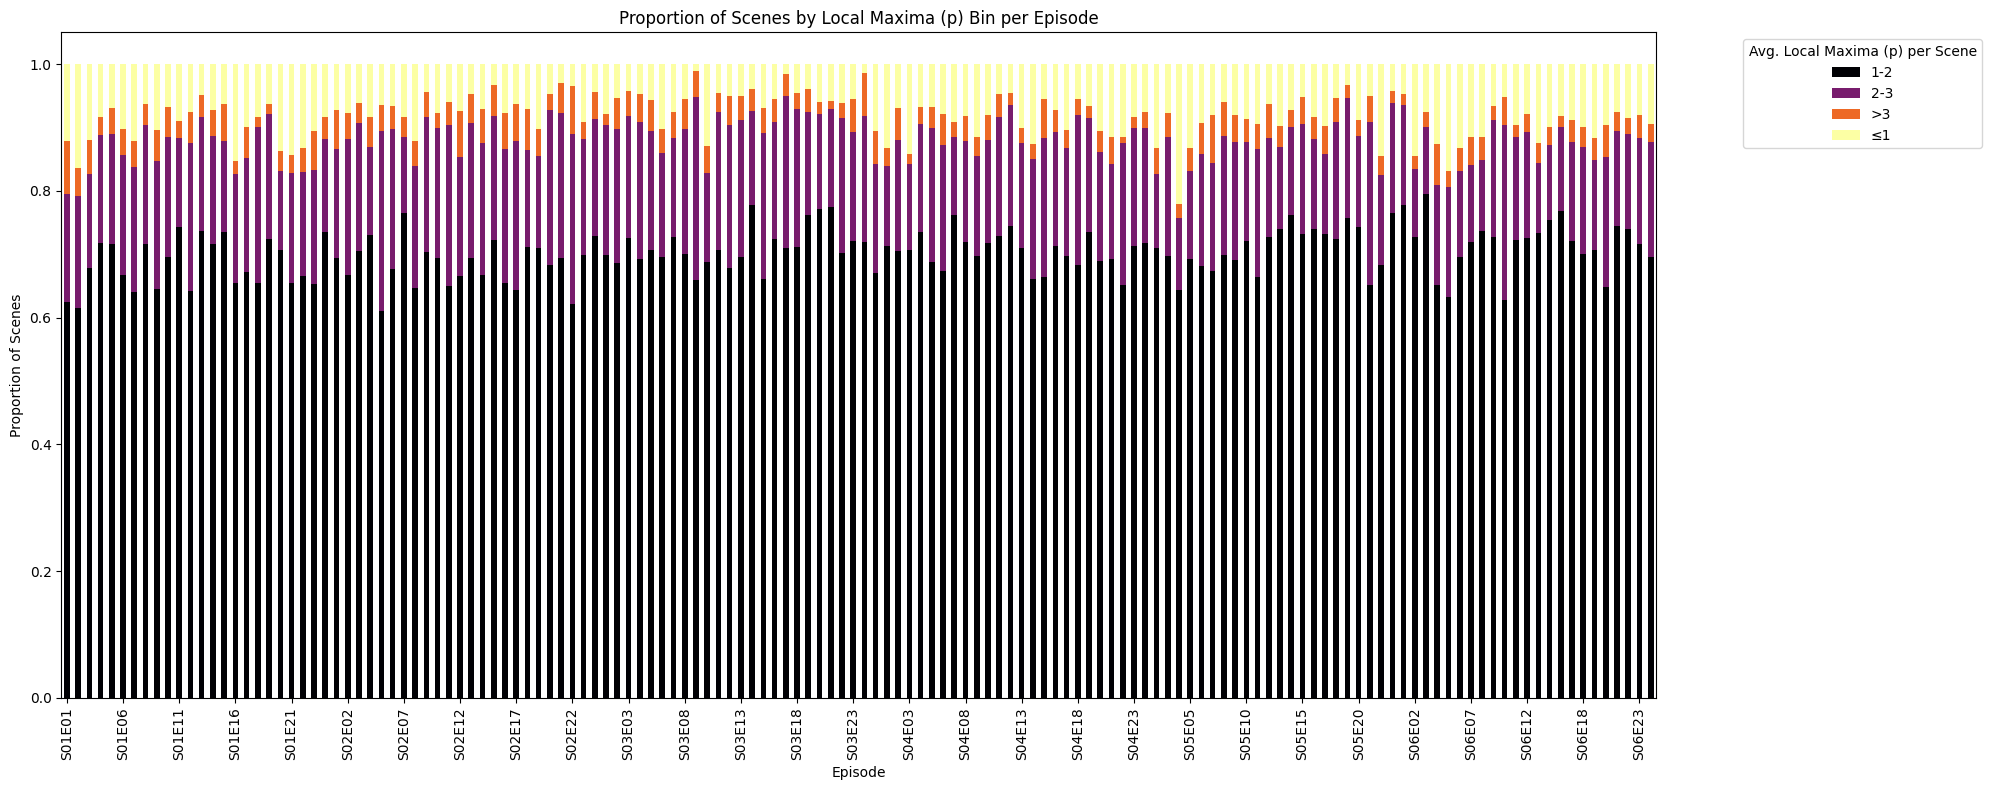

In [18]:
scene_df = df.groupby(['episode_short', 'global_scene_number'])['p'].mean().reset_index()

conditions = [
    (scene_df['p'] <= 1),
    (scene_df['p'] > 1) & (scene_df['p'] <= 2),
    (scene_df['p'] > 2) & (scene_df['p'] <= 3),
    (scene_df['p'] > 3)
]
labels = ['≤1', '1-2', '2-3', '>3']

scene_df['p_bin'] = np.select(conditions, labels, default='other') 
# 3. Count number of scenes per bin per episode
scene_counts = scene_df.groupby(['episode_short', 'p_bin'],observed = True).size().unstack(fill_value=0)

# 4. Normalize to get proportions
scene_ratios = scene_counts.div(scene_counts.sum(axis=1), axis=0)

# 5. Plot

ax = scene_ratios.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='inferno')

# Optional: Thin the x-axis labels for readability
ax.set_xticks(ax.get_xticks()[::5])

plt.title("Proportion of Scenes by Local Maxima (p) Bin per Episode")
plt.xlabel("Episode")
plt.ylabel("Proportion of Scenes")
plt.legend(title='Avg. Local Maxima (p) per Scene', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
scene_df

,episode_short,global_scene_number,p,p_bin
0,S01E01,1.0,2.458256,other
1,S01E01,2.0,1.865248,other
2,S01E01,3.0,1.055118,other
3,S01E01,4.0,1.000000,1
4,S01E01,5.0,1.823529,other
...,...,...,...,...
47467,S06E24,47655.0,1.644699,other
47468,S06E24,47656.0,1.093750,other
47469,S06E24,47657.0,1.192708,other
47470,S06E24,47658.0,1.106599,other


/tmp/ipykernel_11719/1349885361.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_p_season, x="season", y="p", palette="magma")


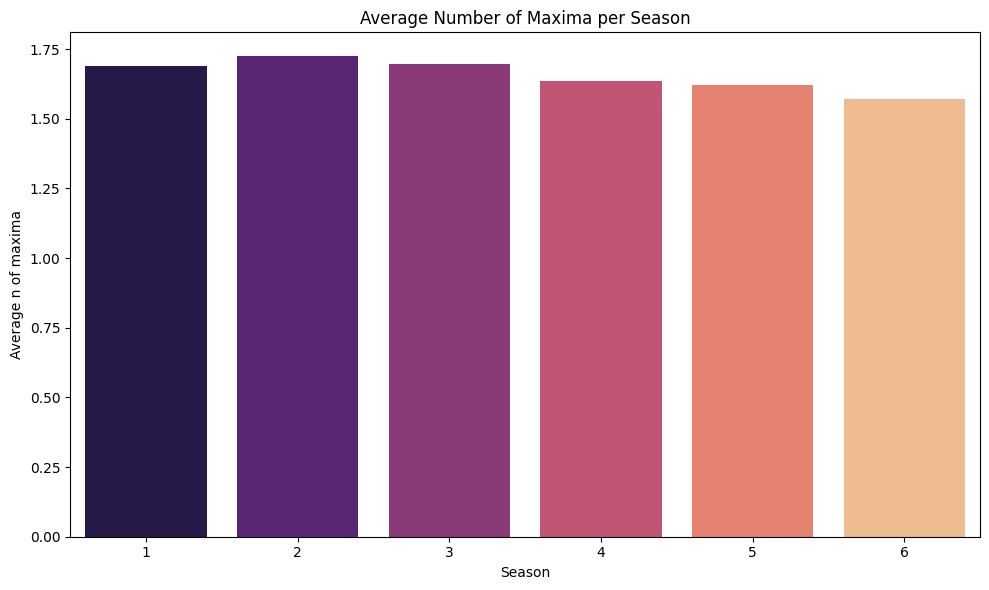

In [19]:
# Extract season number
df["season"] = df["episode"].str.extract(r's(\d+)', expand=False).astype(int)
# plot for average number of maxima per season
mean_p_season = df.groupby("season")["p"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_p_season, x="season", y="p", palette="magma")
plt.title("Average Number of Maxima per Season")
plt.ylabel("Average n of maxima")
plt.xlabel("Season")
plt.tight_layout()
plt.show()


/tmp/ipykernel_11719/462223823.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_p, x="episode_short", y="p", palette="viridis")


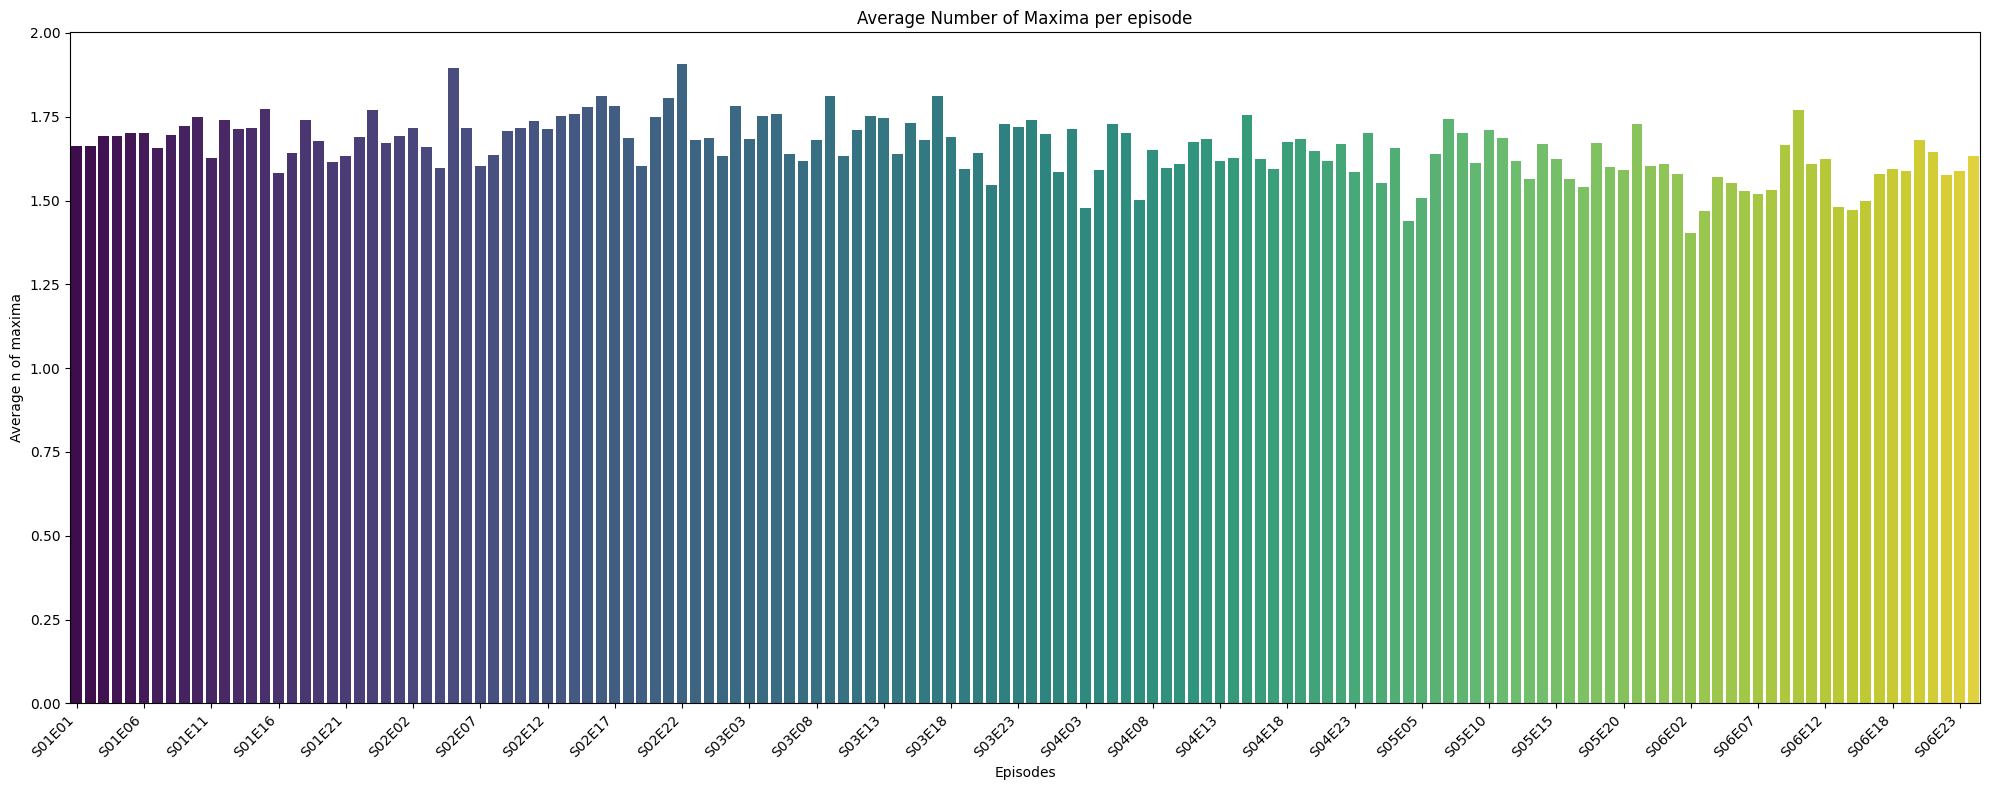

In [20]:
#gets short version of episodes
df["episode_short"] = df["episode"].str.extract(r'(s\d+e\d+)', expand=False).str.upper()
# plot for average number of maxima per episodes
mean_p = df.groupby(["season", "episode_short"]).agg({"p": "mean"}).reset_index()

plt.figure(figsize=(20, 8))
ax = sns.barplot(data=mean_p, x="episode_short", y="p", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Average Number of Maxima per episode")
plt.ylabel("Average n of maxima")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()


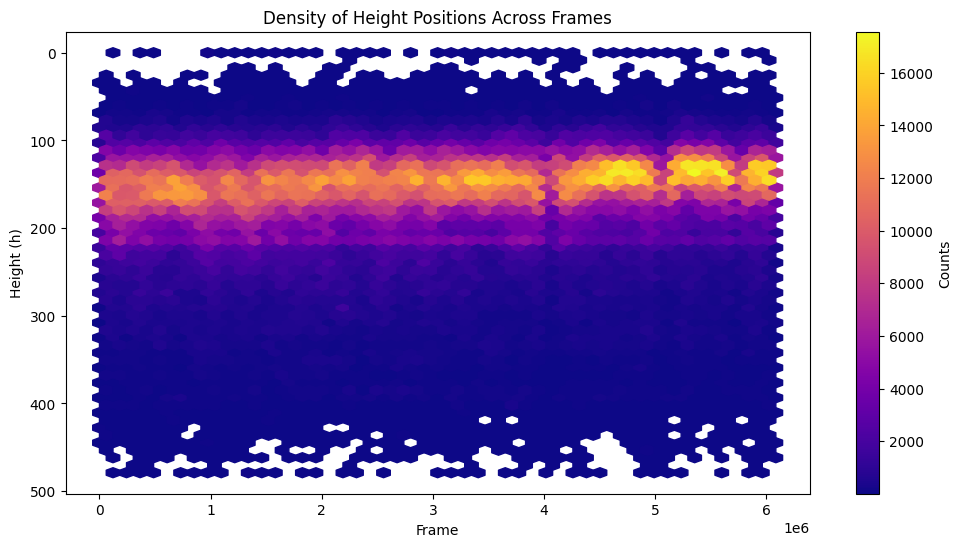

In [21]:
# plot for Density of Height Positions Across Frames
plt.figure(figsize=(12, 6))
plt.hexbin(df["frame"], df["h"], gridsize=50, cmap="plasma", mincnt=1)
plt.gca().invert_yaxis()
plt.colorbar(label="Counts")
plt.xlabel("Frame")
plt.ylabel("Height (h)")
plt.title("Density of Height Positions Across Frames")
plt.show()


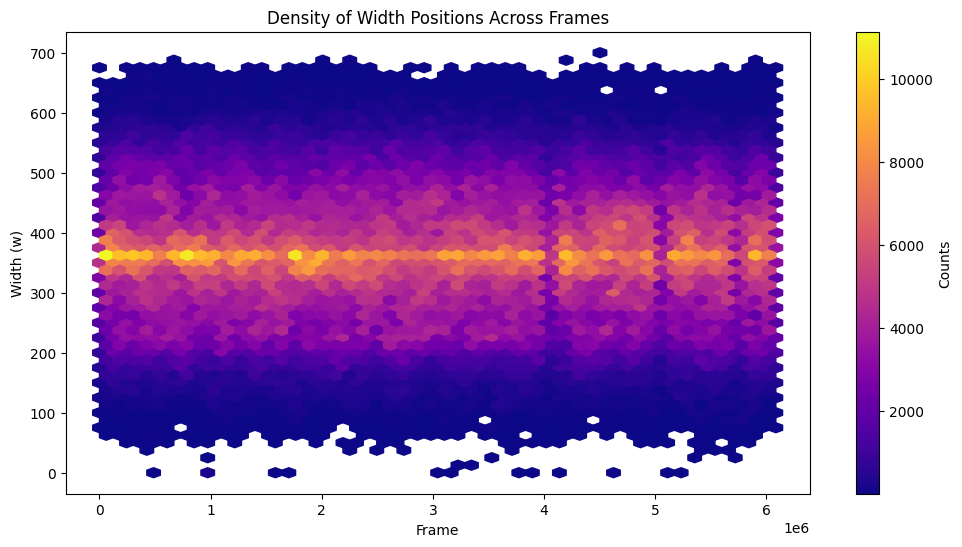

In [22]:
# plot for Density of width Positions Across Frames
plt.figure(figsize=(12, 6))
plt.hexbin(df["frame"], df["w"], gridsize=50, cmap="plasma", mincnt=1)
plt.colorbar(label="Counts")
plt.xlabel("Frame")
plt.ylabel("Width (w)")
plt.title("Density of Width Positions Across Frames")
plt.show()


In [23]:
# get stats on h and w depending on the scene_number
scene_stats = df.groupby(["episode_short", "global_scene_number"]).agg({
    "h": ["mean", "std", "min", "max"],
    "w": ["mean", "std", "min", "max"]
}).reset_index()

# Optional: flatten multi-level columns
scene_stats.columns = ["episode_short", "global_scene_number", "h_mean", "h_std", "h_min", "h_max",
                       "w_mean", "w_std", "w_min", "w_max"]


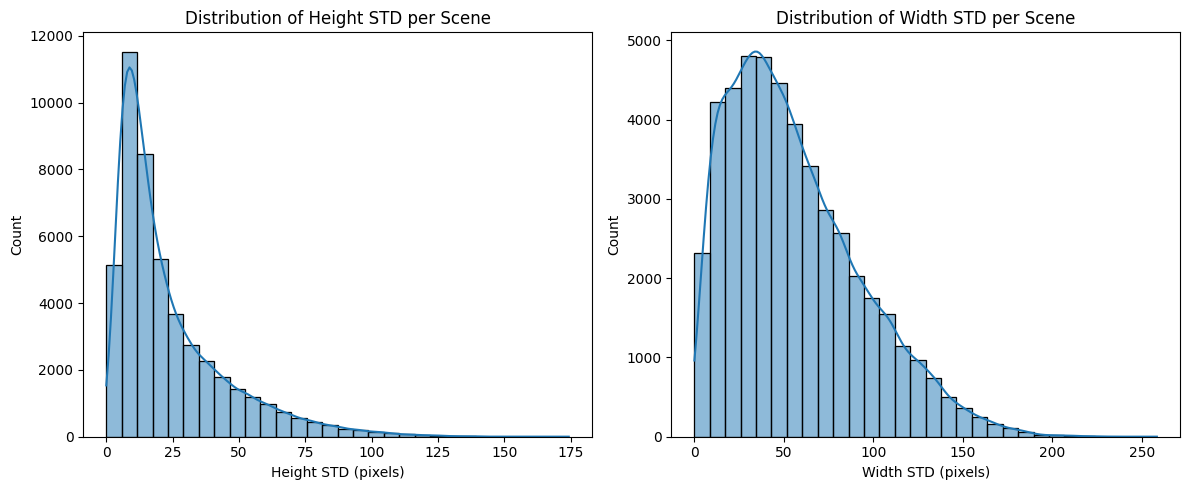

In [24]:
#plot to show distribution of how much coordinates in scenes vary 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(scene_stats["h_std"], bins=30, kde=True)
plt.title("Distribution of Height STD per Scene")
plt.xlabel("Height STD (pixels)")

plt.subplot(1,2,2)
sns.histplot(scene_stats["w_std"], bins=30, kde=True)
plt.title("Distribution of Width STD per Scene")
plt.xlabel("Width STD (pixels)")

plt.tight_layout()
plt.show()


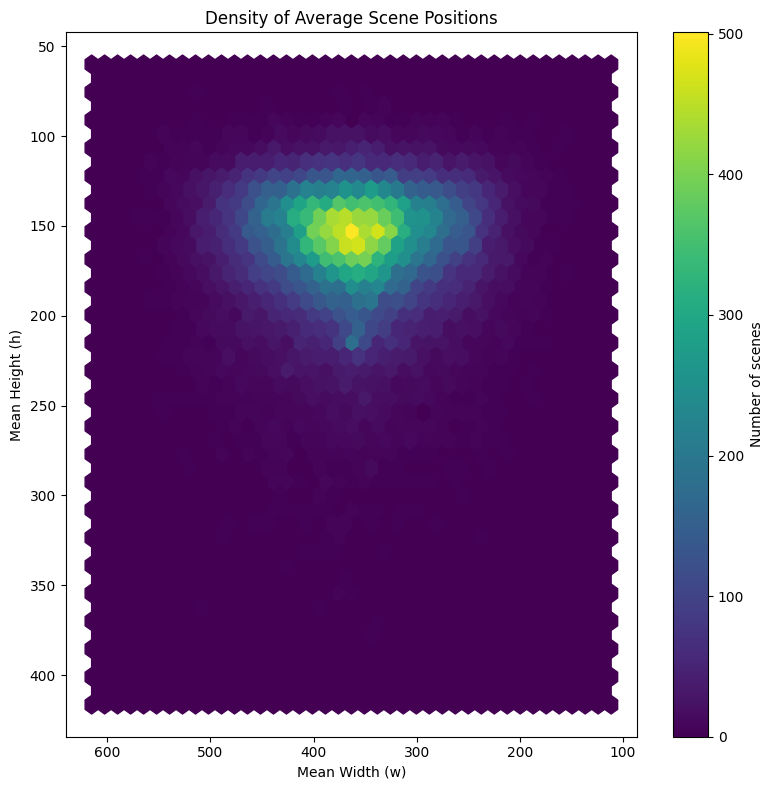

In [25]:
#plots the mean of h and w per scenes to see the density of each
#ajust for sceen size?
plt.figure(figsize=(8, 8))
plt.hexbin(scene_stats["w_mean"], scene_stats["h_mean"], gridsize=40, cmap="viridis")
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar(label="Number of scenes")
plt.title("Density of Average Scene Positions")
plt.xlabel("Mean Width (w)")
plt.ylabel("Mean Height (h)")
plt.tight_layout()
plt.show()

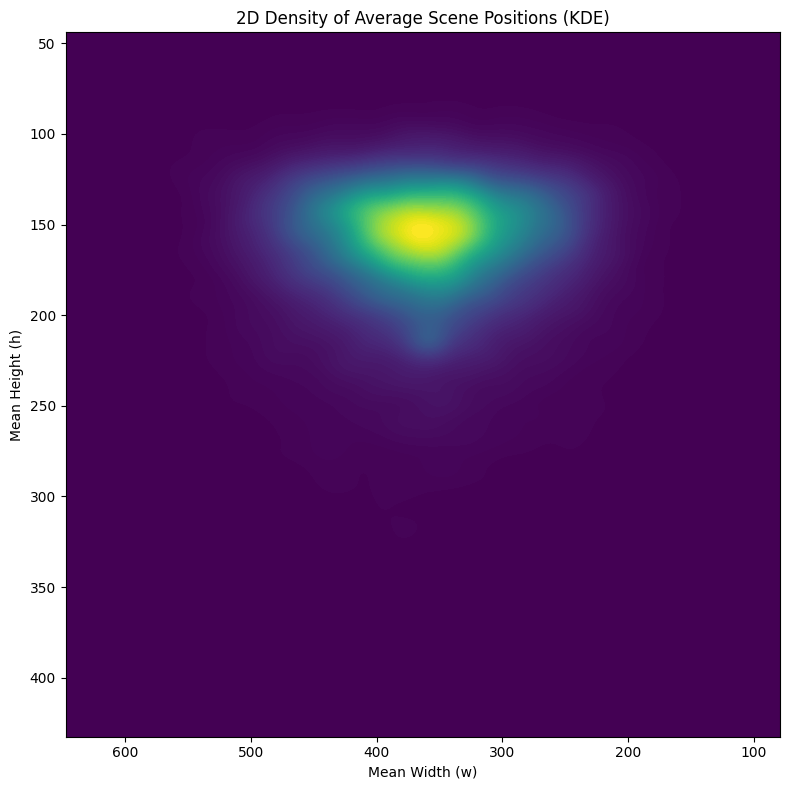

In [26]:


plt.figure(figsize=(8, 8))
sns.kdeplot(
    x=scene_stats["w_mean"], 
    y=scene_stats["h_mean"], 
    fill=True,  # fill the contours
    cmap="viridis",
    thresh=0,   # show full density (no threshold)
    levels=100  # number of contour levels (smoothness/detail)
)

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title("2D Density of Average Scene Positions (KDE)")
plt.xlabel("Mean Width (w)")
plt.ylabel("Mean Height (h)")
plt.tight_layout()
plt.show()
